<a href="https://colab.research.google.com/github/aztecman/DataLit/blob/master/Iris_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means Clustering with Scikit-Learn
### School of AI - DataLit Week 7
#### Any mistakes made here are the sole property of I, Carson Bentley

Hello wizards and welcome to week 7 of data-lit.
In this article we’ll be going over some of the basics of the k-means clustering algorithm using the python library sklearn.





## Clustering
Clustering means finding groups of similar things. In this way it bears similarity to classification as well as dimensionality reduction - a topic which we will learn more about next week. Rather than use labeled data, groups are formed based on how close the associated data points are in feature-space.


## K-Means
The basic Idea behind k-means is that we are interested in finding ‘k’ number of clusters by iteratively estimating the centers of those clusters. The centers are called ‘centroids’. We find them by assigning nearby points to clusters, and then getting the average of each of those sets of points. This approach is called the Lloyd - Forgy method.

## Pseudocode
The algorithm can be summarized in five steps:
1. Choose a number of clusters to look for
2. Assign each data point to a random cluster (initialization)
3. Compute the centroid (mean) of each cluster
4. Reassign each point to the cluster associated with the nearest centroid.
5. Repeat steps 3 and 4 until our centroids have stabilized, or until a fixed number of iterations have passed.


## Assumptions

One of the main assumptions we make when applying this method, is that the clusters are spherical or the equivalent shape in another number of dimensions (such as circle for 2D). This makes intuitive sense, since we are assigning groups based on how close points are to the the center of a particular cluster.

A few more caveats to watch for:

- We must choose the correct number clusters for the algorithm to find.
- The variance of features determines how much influence they have. Therefore, it's often necessary to apply a [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to give each feature a mean of zero and a standard deviation of 1. This technique is also important for [Principal Component Analysis](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py).
- We can only treat our results as valid if we assume the blobs are not anisotropicly distributed.

![from scikit-learn.org](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_assumptions_001.png)

Graphic from scikit-learn.org

As you can see, unevenly sized blobs are not a problem.

## Use-Cases for K-Means
- [Customer segmentation](https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac)
- [Clustering text documents](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py)
- [Improving features for classification](https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a)
- [Image compression](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py)

## K-Means on the GPU
Particularly for large values of k, significant speedups can be achieved [by making use of CUDA](https://github.com/serban/kmeans).

## Hierarchical clustering
Hierarchical clustering is another commonly used algorithm. It works by joining together nearby points into small groups and then iteratively joining those small groups into larger ones. At the end, we go back and find the layer of the process where the groups are the most spread out. Therefore, it is not necessary to preselect the number of clusters to look for when using this method. It should be noted that while the time to compute k-means scales linearly to the size of the data, hierarchical clustering tends to be much more computationally expensive (quadratic). 

[K-means vs hierarchical clustering](https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/)


## Scikit-Learn for K-Means

One of the easiest python libraries to use for clustering and other data analysis tasks is scikit-learn (sklearn for short). 

https://scikit-learn.org/

In [0]:
import sklearn

In [0]:
from sklearn import datasets # we need the iris dataset from here
from sklearn.cluster import KMeans # here is our main function
from sklearn.preprocessing import StandardScaler # this will reduce our mean to 0 and standard deviation to 1 for each feature
from sklearn.pipeline import make_pipeline # this helps us to apply a standard scaler to our k-means

In [0]:
import matplotlib.pyplot as plt

We'll be looking at a toy dataset of iris species collected in the 30s by statistician and biologist Ronald Fisher. The data contains sepal and petal width and length for Iris setosa, Iris virginica and Iris versicolor.

In [0]:
iris_samples = datasets.load_iris()

In [6]:
type(iris_samples)

sklearn.utils.Bunch


To explore a python object you are not familiar with, it's often useful to try the built in help() function.

In [7]:
help(iris_samples)

Help on Bunch in module sklearn.utils object:

class Bunch(builtins.dict)
 |  Container object for datasets
 |  
 |  Dictionary-like object that exposes its keys as attributes.
 |  
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      __dir__() -> list
 |      default dir() implementation
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Implement setattr(self, name, value).
 |  
 |  __setstate__(self, state)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__


In [9]:
iris_samples.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

As you can see, the data is in a pseudo-dictionary.

In [10]:
type(iris_samples['data'])

numpy.ndarray

We'll create our model by choosing a number of clusters. 

Here are some other arguments you may find useful to explore:
- init
- n_init
- max_iter
- algorithm

use help(KMeans) for more info on these arguments and other details

Reading documentation on the 'algorithm' argument gives us some insight into how sklearn handles the math.

In [0]:
model = KMeans(n_clusters=3)

The fit method below expects a numpy array with each column as a seperate feature, and each row as a sample.

In [13]:
model.fit(iris_samples['data'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
labels = model.predict(iris_samples['data'])

In [15]:
# names of features are available via the appropriate key
iris_samples['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
# seperate features for graphing
sepal_lengths = iris_samples['data'][:,0]
sepal_widths = iris_samples['data'][:,1]
petal_lengths = iris_samples['data'][:,2]
petal_widths = iris_samples['data'][:,3]

We can visualize the results by passing our labels to the c (color) argument of a scatter plot.

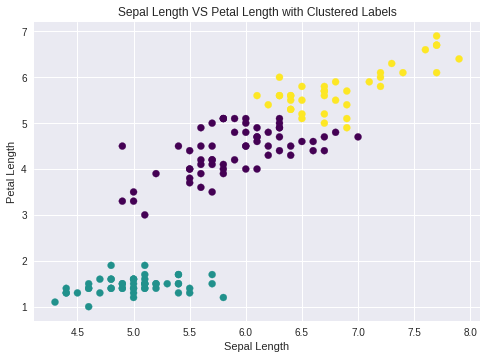

In [21]:
plt.scatter(sepal_lengths, petal_lengths, c=labels, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length VS Petal Length with Clustered Labels')
plt.show()

Ground-truth labels are available via the 'target' key. This allows us to see how well K-Means worked on this data. 

Obviously, this would not be the case in a real unsupervised problem.

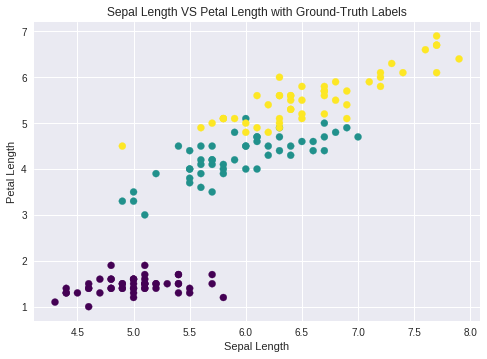

In [22]:
plt.scatter(sepal_lengths, petal_lengths, c=iris_samples['target'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length VS Petal Length with Ground-Truth Labels')
plt.show()

Since we are only dealing with a handful of features, let's look at the data from every available angle.

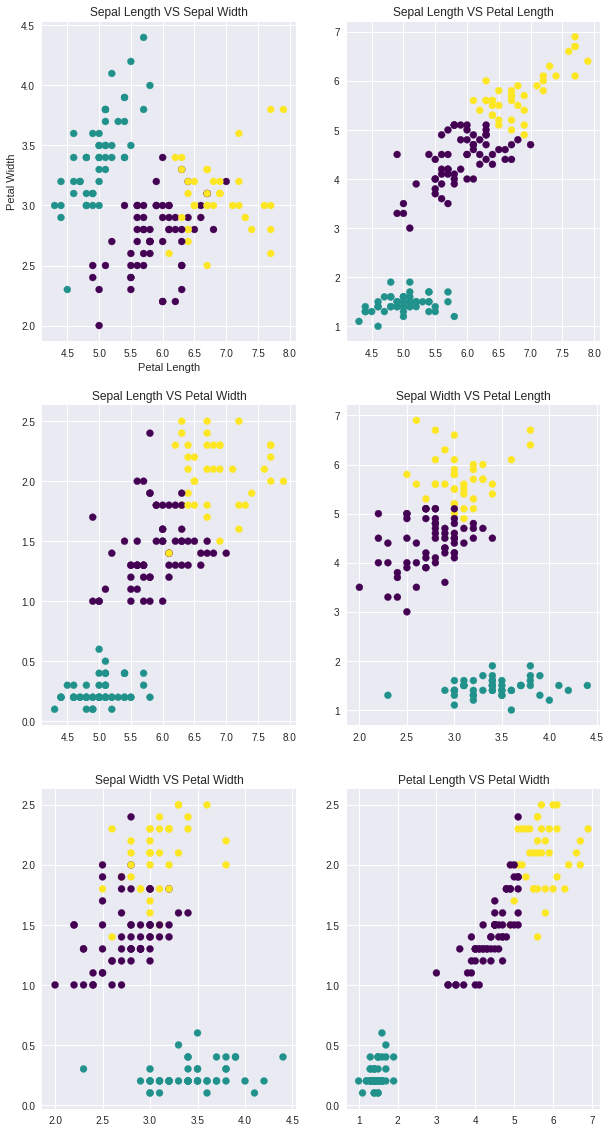

In [18]:
_ , axarr = plt.subplots(3, 2,figsize=(10,20))

axarr[0, 0].scatter(sepal_lengths, sepal_widths, c=labels, cmap='viridis')
axarr[0, 0].set_title('Sepal Length VS Sepal Width')
axarr[0, 0].set(xlabel='Sepal Length', ylabel='Sepal Width')

axarr[0, 1].scatter(sepal_lengths, petal_lengths, c=labels, cmap='viridis')
axarr[0, 1].set_title('Sepal Length VS Petal Length')
axarr[0, 0].set(xlabel='Sepal Length', ylabel='Petal Length')

axarr[1, 0].scatter(sepal_lengths, petal_widths, c=labels, cmap='viridis')
axarr[1, 0].set_title('Sepal Length VS Petal Width')
axarr[0, 0].set(xlabel='Sepal Length', ylabel='Petal Width')

axarr[1, 1].scatter(sepal_widths, petal_lengths, c=labels, cmap='viridis')
axarr[1, 1].set_title('Sepal Width VS Petal Length')
axarr[0, 0].set(xlabel='Sepal Width', ylabel='Petal Length')

axarr[2, 0].scatter(sepal_widths, petal_widths, c=labels, cmap='viridis')
axarr[2, 0].set_title('Sepal Width VS Petal Width')
axarr[0, 0].set(xlabel='Sepal Width', ylabel='Petal Width')

axarr[2, 1].scatter(petal_lengths, petal_widths, c=labels, cmap='viridis')
axarr[2, 1].set_title('Petal Length VS Petal Width')
axarr[0, 0].set(xlabel='Petal Length', ylabel='Petal Width')

plt.show()

## Inertia
If we didn't already know the number of clusters, we'd need to try different values of K. By graphing a property called inertia, we can apply what's called the 'elbow method' and visually inspect for a sharp elbow-like transition. 

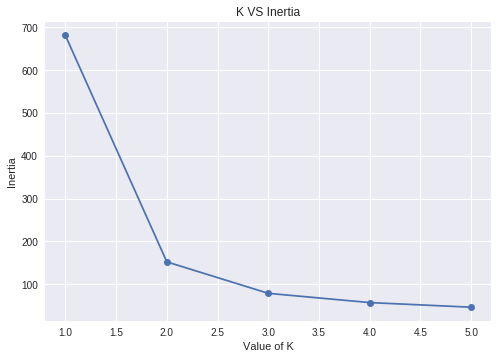

In [23]:
inertias = []

for k in range(1, 6):
    model = KMeans(n_clusters=k)
    model.fit(iris_samples['data'])
    inertias.append(model.inertia_)
    
plt.plot(list(range(1, 6)), inertias, '-o')
plt.title('K VS Inertia')
plt.xlabel('Value of K')
plt.ylabel('Inertia')
plt.show()

Although the elbow might mislead us to think that we have two clusters instead of three in this particular instance, I think it's fair to say that the data visually breaks up into 2 distinct visual clusters.

The code below demonstrates how to make use of a standard scalar. In this particular instance it doesn't help hugely.

In [0]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)

In [0]:
pipeline.fit(iris_samples['data'])
standardized_labels = pipeline.predict(iris_samples['data'])

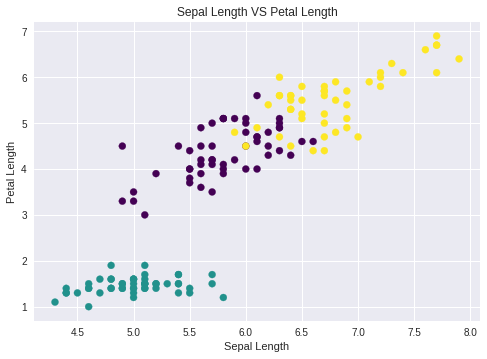

In [26]:
plt.scatter(sepal_lengths, petal_lengths, c=standardized_labels, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length VS Petal Length')
plt.show()

In [27]:
pipeline.get_params()

{'kmeans': KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 'kmeans__algorithm': 'auto',
 'kmeans__copy_x': True,
 'kmeans__init': 'k-means++',
 'kmeans__max_iter': 300,
 'kmeans__n_clusters': 3,
 'kmeans__n_init': 10,
 'kmeans__n_jobs': None,
 'kmeans__precompute_distances': 'auto',
 'kmeans__random_state': None,
 'kmeans__tol': 0.0001,
 'kmeans__verbose': 0,
 'memory': None,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('kmeans',
   KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0

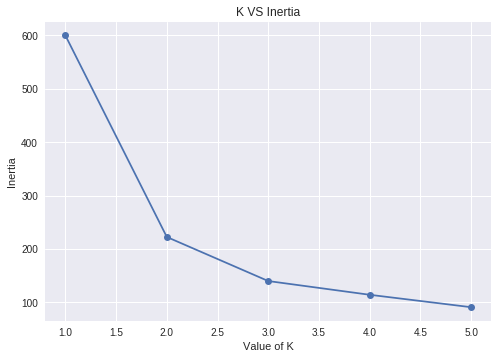

In [28]:
inertias = []

for k in range(1, 6):
    kmeans = KMeans(n_clusters=k)
    pipeline = make_pipeline(scaler, kmeans)
    pipeline.fit(iris_samples['data'])
    inertias.append(pipeline.named_steps['kmeans'].inertia_)
    
plt.plot(list(range(1, 6)), inertias, '-o')
plt.title('K VS Inertia')
plt.xlabel('Value of K')
plt.ylabel('Inertia')
plt.show()